In [41]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns

### Holidays:

    - NY marathon Nov,7 2021
    - Thanksgiving (parade) Nov 25, 2021
    - Christmas Dec 24 and Dec 25
    - New Years Dec 31 and Jan 1
    - Independence Day July 4

In [384]:
def reformat_df(df):
    df.columns=df.columns.str.lower().str.replace(' ','')
    df.drop(columns=['c/a','unit', 'scp', 'linename', 'division', 'time', 'desc'],axis=1,inplace=True)
    df = df.groupby("station").agg("sum").sort_values(by="entries",ascending=False).head(20)
    
    return df

In [385]:
def plot_df(df, name):
    f, ax = plt.subplots(figsize=(6, 15))
    f.tight_layout()
    # Plot
    kwargs = {'alpha':0.85}
    sns.set_color_codes('pastel')
    sns.barplot(x= df['entries'], y=df.index, data=df,label='Entries', color='r',**kwargs)
    sns.barplot(x= df['exits'], y=df.index, data=df,label='Exits', color='b',**kwargs)
    ax.set_title('Traffic flow for ' + name)
    ax.set_xlabel('Passengers', fontsize = 16)
    ax.set_ylabel('Station', fontsize = 16)
    ax.legend(fontsize = 16);
    

In [386]:
# downloading initial file.
df_marathon = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211113.txt',sep = ',')
df_thanksgiving = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211127.txt', sep = ',')
df_christmas = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_211225.txt',sep = ',')
df_newYear = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220101.txt',sep = ',')
df_fourthOfJuly = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220709.txt',sep = ',') 

In [387]:
df_marathon[df_marathon['DATE'] == '11/07/2021']
df_thanksgiving[df_thanksgiving['DATE'] == '11/25/2021']
df_christmas[(df_christmas['DATE'] == '12/24/2021') & (Christmas['DATE'] == '12/25/2021')]
df_newYear[(df_newYear['DATE'] == '12/31/2021') & (New_Year['DATE'] == '01/01/2022')]
df_fourthOfJuly[df_fourthOfJuly['DATE'] == '07/04/2022']

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
12,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/04/2022,00:00:00,REGULAR,7733098,2721276
13,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/04/2022,04:00:00,REGULAR,7733104,2721279
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/04/2022,08:00:00,REGULAR,7733106,2721304
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/04/2022,12:00:00,REGULAR,7733126,2721338
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/04/2022,16:00:00,REGULAR,7733175,2721366
...,...,...,...,...,...,...,...,...,...,...,...
211263,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/04/2022,07:50:20,REGULAR,0,676
211264,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/04/2022,09:00:00,REGULAR,0,676
211265,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/04/2022,13:00:00,REGULAR,0,677
211266,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/04/2022,17:00:00,REGULAR,0,680


In [388]:
stations = [{'df':df_marathon, 'name':'Marathon'}, 
            {'df':df_thanksgiving, 'name':'Thanksgiving'}, 
            {'df':df_christmas, 'name':'Christmas'}, 
            {'df':df_newYear, 'name':'New Year'}, 
            {'df':df_fourthOfJuly, 'name':'Fourth of July'}]

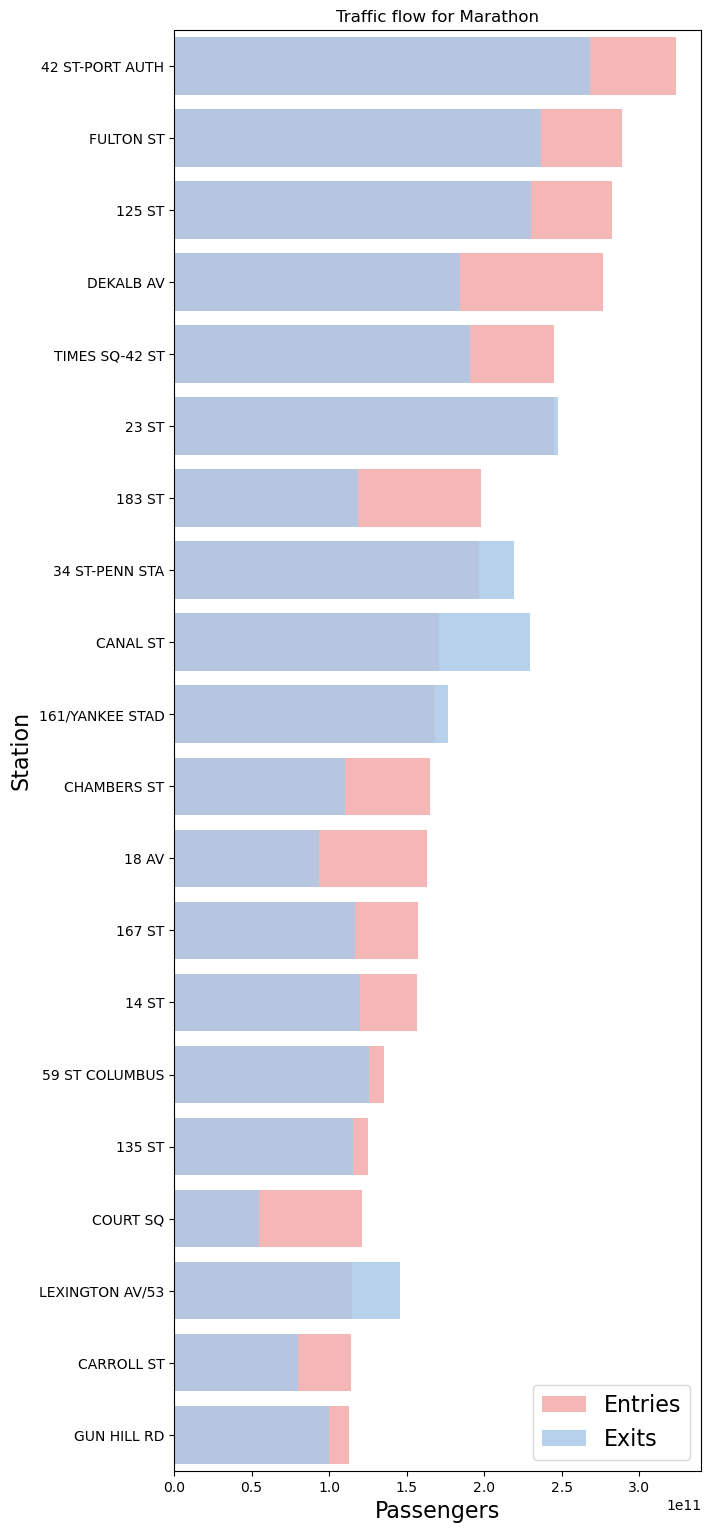

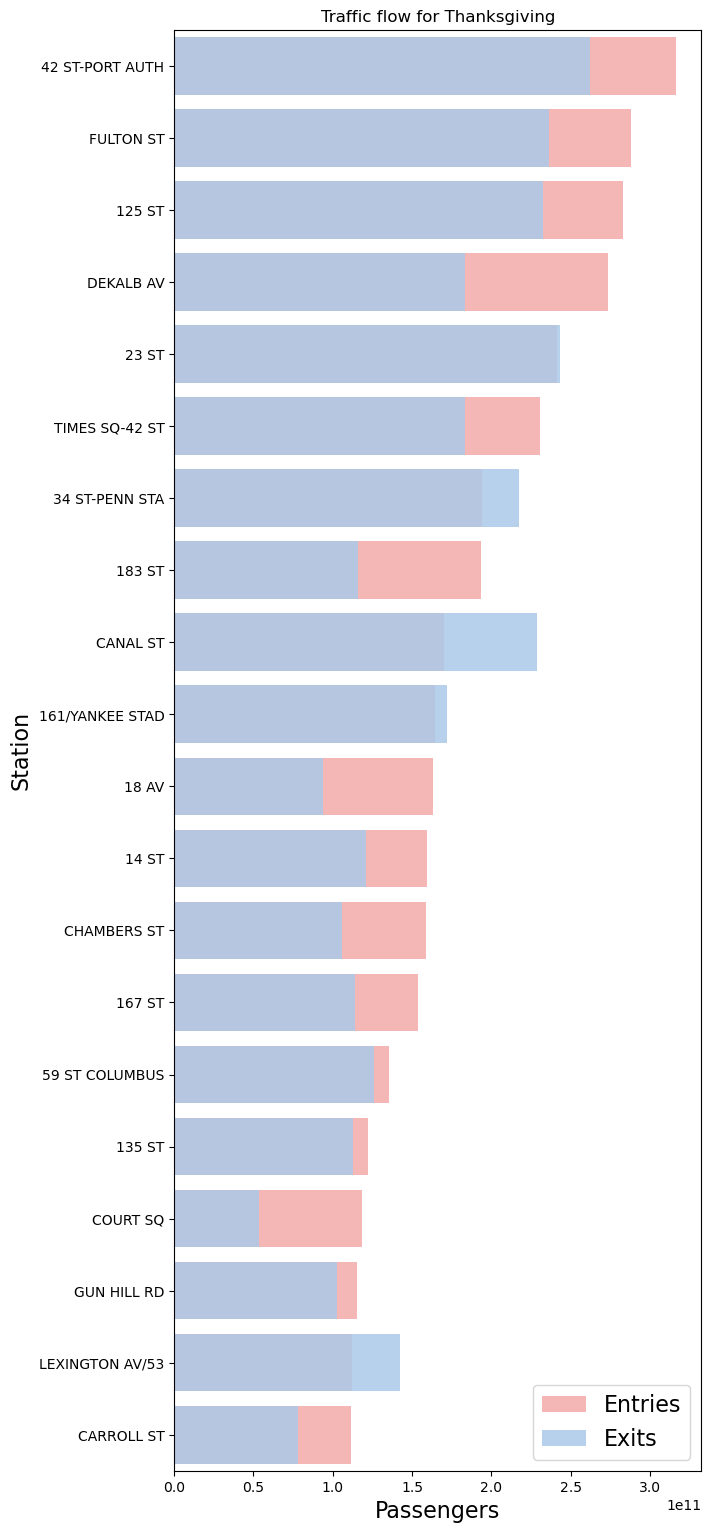

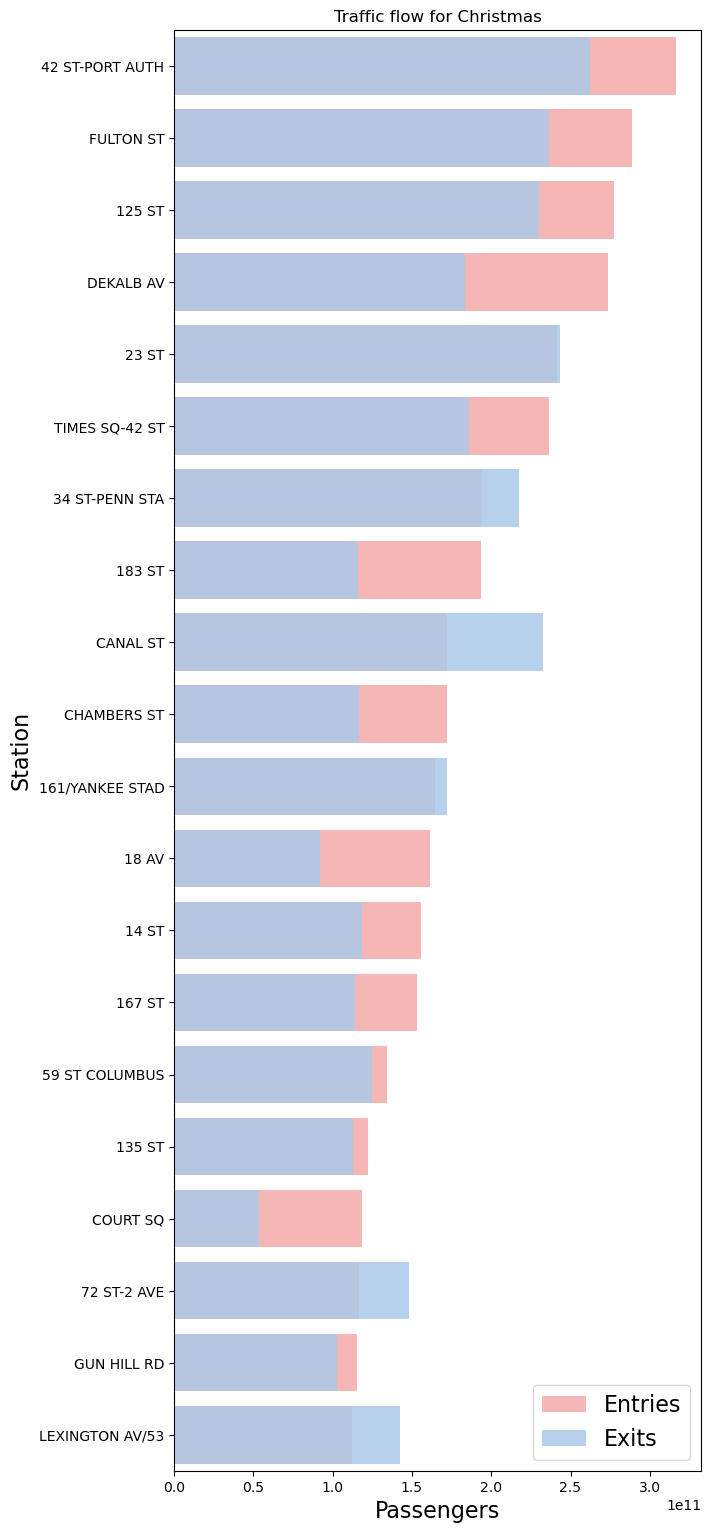

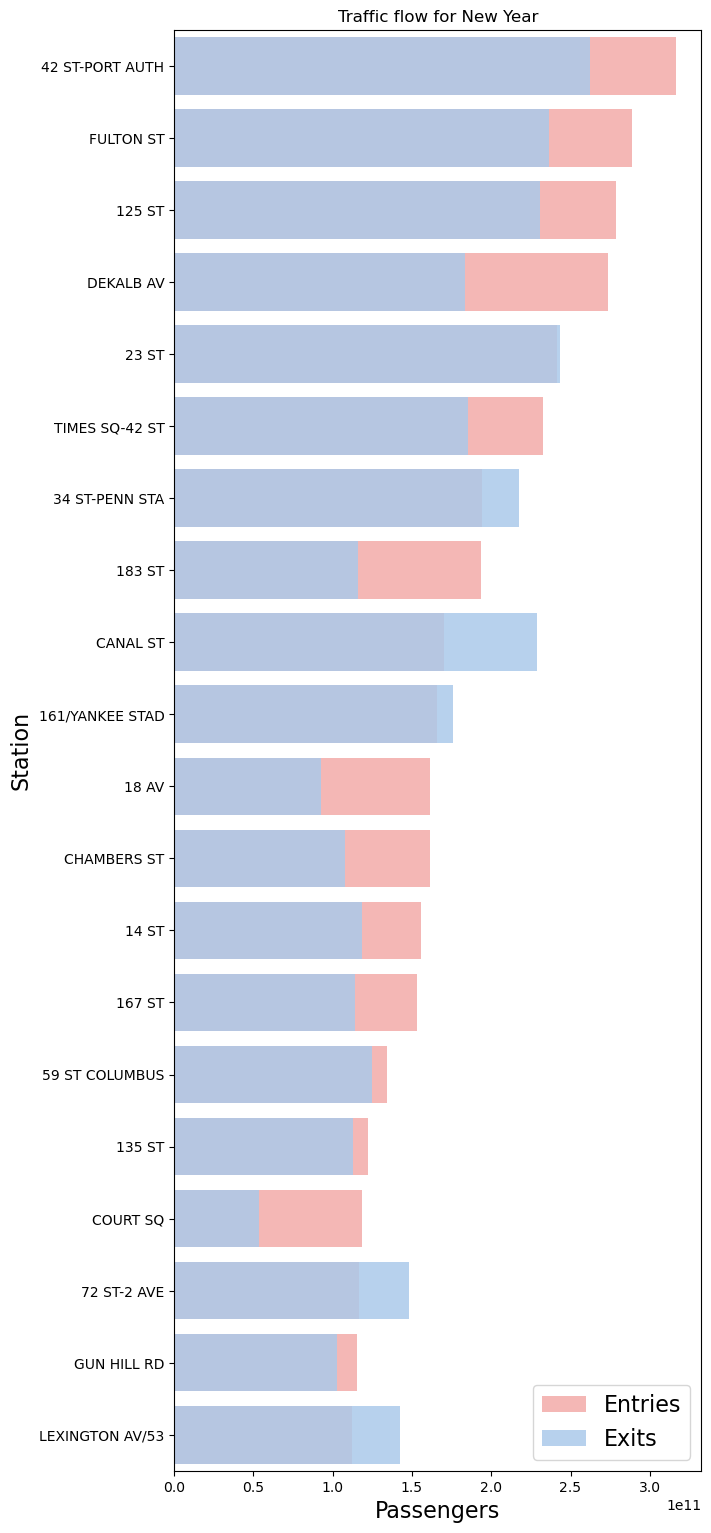

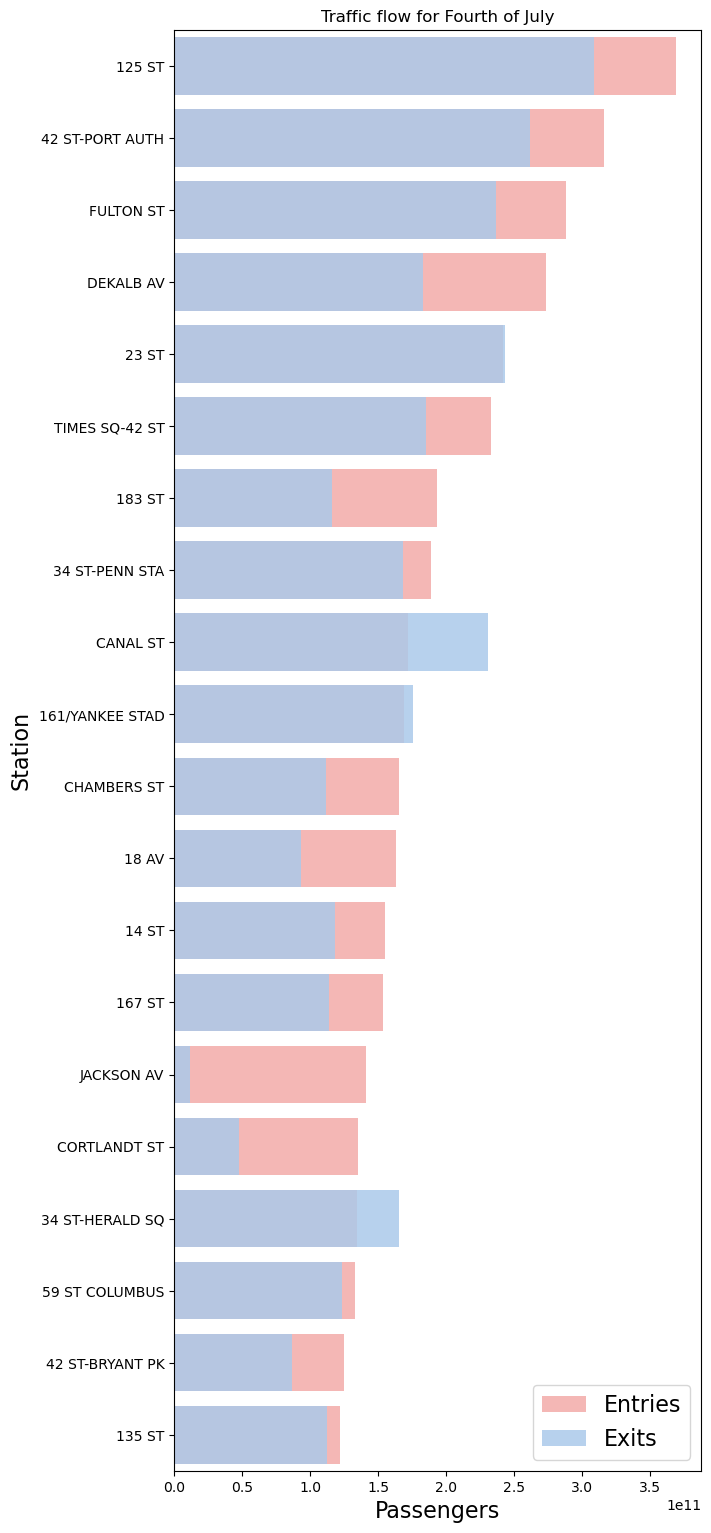

In [389]:
for station in stations:
    station['df'] = reformat_df(station['df'])
    plot_df(station['df'], station['name'])